In [2]:
# Import all the libraries 
import nrrd
from skimage import io
import sys
import napari
import flammkuchen as fl
from pathlib import Path
import numpy as np
import os, glob
# import ants

# Define anatomical space
from bg_space import AnatomicalSpace
# import ZBRAIN



ModuleNotFoundError: No module named 'nrrd'

In [1]:
# Import path to z-brain directory
import sys
Z_BRAIN_directory_modules = r'Z:\Shared\Michael\Morph files\Z-BRAIN'
sys.path.append(Z_BRAIN_directory_modules)

# Load the relevant data
path_to_morphed_coord = r'\\FUNES\Shared\Michael\Morph files\zbrain attempt\mov_roi_coords_transformed - Copy.h5'
path_to_ref = r'\\FUNES\Shared\Michael\Morph files\zbrain attempt\ref_mapped.h5'
path_to_morph_stack = r'\\FUNES\Shared\Michael\Morph files\zbrain attempt\220221_f0_affine.h5'
mask_path = Path(r'C:\Users\NetworkUser\Documents\Python Scripts\Michael_scripts\Graph-analysis-michael\morphing\masking regions')

# data2, header = nrrd.read(r'', index_order='C')
# ref = io.imread(r"C:\Users\NetworkUser\Documents\Python Scripts\Michael_scripts\Graph-analysis-michael\morphing\reference atlas\Elavl3-H2BRFP.tif")

NameError: name 'Path' is not defined

In [119]:
# Denote variables
brainz_res = (2,0.798,0.798) # Obtained from the site

#Define morphing space...
morphing_as = AnatomicalSpace('rai', resolution=(1,1,1))


# Region dictionary:
region_d = {}

# Load the stack
morph_stack = fl.load(path_to_morph_stack)
ref_stack = fl.load(path_to_ref)
morphed_coord = fl.load(path_to_morphed_coord)

# Start Napari
viewer = napari.view_image(morph_stack,  colormap="green")
viewer.add_image(ref_stack, blending="additive")

# for filename in glob.glob('*.nrrd'):
path_list = list((mask_path).glob('*.nrrd*'))
for path in path_list:
    data, header = nrrd.read(path, index_order='C')
    region = np.transpose(data, (0, 2, 1))
    region_name = os.path.basename(path)[:-5]
    
    # Morph masks onto common morphing space (Not the most efficient way):
    # TODO - Make more efficient
    ref_as = AnatomicalSpace("sra", resolution=brainz_res,shape=region.shape) # The masks might be differents
    region_mapped = ref_as.map_stack_to(morphing_as, region)
    
    # Add transformed region to viewer
    viewer.add_image(region_mapped, blending="additive", contrast_limits=[0,15], name=region_name)
    
    # Insert into dictionary for later analysis
    region_d.update({region_name:region_mapped})
    
    print('Morphed ')

    
viewer.add_image(morphed_coord, blending="additive", name='Cellular coordinates')


# with open(next((mask_path ).glob('*.nrrd*')), "r") as f:
#     print(f.read())
#     data, header = nrrd.read(f, index_order='C')
#     arr_reshaped = np.transpose(data, (0, 2, 1))
#     viewer.add_image(arr_reshaped, colormap="magenta", blending="additive")
    

   
      # do your stuff

Morphed 
Morphed 
Morphed 
Morphed 
Morphed 
Morphed 
Morphed 
Morphed 
Morphed 
Morphed 
Morphed 
Morphed 
Morphed 
Morphed 
Morphed 
Morphed 
Morphed 


<Image layer 'Cellular coordinates' at 0x20e31dabcc8>

In [123]:
region_mapped.shape

(496, 1122, 276)

In [64]:
ref_stack.shape

(496, 1122, 276)

In [70]:
region_mapped.shape

(496, 1122, 276)

In [ ]:
# Run over all coordinates, generate all combinations of surrounding, check belonging to each region
for coordinate in list():

    for region in region_list():


In [120]:
# Test algorithm
def getsumofneighbors(matrix, i, j):
    # TODO: A bit redundant because I calculate along all  axis
    region = matrix[max(0, i-1) : i+2,
                    max(0, j-1) : j+2]
    sum_arr =  np.sum(region) - matrix[i, j] # Sum the region and subtract center
    return sum_arr

In [152]:
# count
not(region_list[3])
# 

True

In [143]:
# TODO: Double verify I'm extracting the proper coordinates
'''
There are currently a few problems:
* There might be overlapping regions, thus one region could be assigned technically to multiple, 
but the bigger region get the assingment - there's a need to find double assingment, maybe a dictionary?
* 
'''
import pandas as pd
coord_df = pd.DataFrame(morphed_coord, columns=['x', 'y', 'z'])
region_list = [''] * morphed_coord.shape[0]
count = 0 
max_count = 0 
missed_pnts = 0 

# Loop over
for x,y,z in morphed_coord:
    x = int(x)
    y = int(y)
    z = int(z)
    for index, (region_name, region_mapg) in enumerate(region_d.items()):
        # TODO: Right now I'm ignoring values but there has to be a smarter way
        # Z-Axis is out of bounds
        if z> 275:
            missed_pnts+=1 # Count how many points are missed
            continue     
        
        sum_along_3d = getsumofneighbors(region_mapg[:,:,z], x, y)
        
        if sum_along_3d > 2:
            if bool(region_list[count]) & (max_count > sum_along_3d):
                region_list[count] = region_name
            elif not(region_list[count]):
                region_list[count] = region_name
            max_count = sum_along_3d
    max_count = 0
    count += 1s


54.365936439370564


(array([ 546.,  663.,  444.,  422.,  339.,  437., 1161., 1873.,  827.,
         336.]),
 array([ 36.407036,  61.36225 ,  86.31747 , 111.27268 , 136.2279  ,
        161.18312 , 186.13834 , 211.09355 , 236.04877 , 261.00397 ,
        285.9592  ], dtype=float32),
 <BarContainer object of 10 artists>)

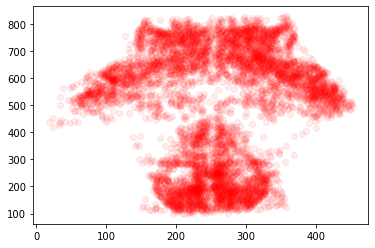

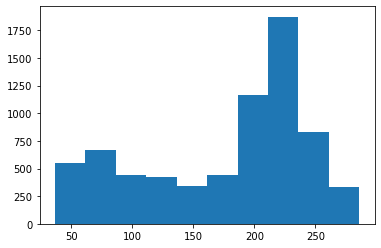

In [190]:
from matplotlib import pyplot as plt

# Test to see success of region allocation
coordinates_assinged = np.where(np.array(region_list)!='')[0].shape[0]
coordinates_total = morphed_coord.shape[0]
success_rate = (coordinates_total - coordinates_assinged )*100/coordinates_total
print(success_rate)

# Display statistics about where regions are generally not assigned
missing_coord = coord_df.loc[coord_df['region_names'] == '']
plt.figure()
plt.scatter(missing_coord['x'].to_numpy(), missing_coord['y'].to_numpy(), c='red', alpha=.075)


# Display histogram along z axis for missing values
plt.figure()
plt.hist(missing_coord['z'].to_numpy())


In [172]:
# Add regions to data frame
coord_df['region_names'] = region_list

In [182]:
coord_df['x'].to_numpy()
coord_df['y'].to_numpy()

array([435.08813, 426.66107, 411.42084, ..., 347.15698, 350.04065,
       237.36322], dtype=float32)

In [165]:
count(missed_pnts)

TypeError: 'int' object is not callable

In [137]:
region_list

['Diencephalon - Habenula',
 'Diencephalon - Rostral Hypothalamus',
 '',
 'Mesencephalon - Medial Tectal Band',
 'Mesencephalon - Tectum Stratum Periventriculare',
 'Mesencephalon - Tecum Neuropil',
 'Mesencephalon - Tegmentum',
 'Mesencephalon - Torus Longitudinalis',
 'Mesencephalon - Torus Semicircularis',
 'Mesencephalon -',
 '',
 'Rhombencephalon - Cerebellum',
 'Rhombencephalon - Corpus Cerebelli',
 'Rhombencephalon - Eminentia Granularis',
 '',
 '',
 'Rhombencephalon -',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '

In [106]:
region_mapped.shape

(496, 1122, 276)

In [126]:
max(morphed_coord.T[2])

285.9592

In [110]:
sum_along_3d

0